# Veri Bilimi Çalışma Soruları


Veri seti: [Titanic](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)

## Kolay Sorular

**Soru 1**: `Embarked` sütununda kaç tane eksik veri olduğunu bulun.

In [2]:
import pandas as pd
import numpy as np
# Titanic veri setini yükleme
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


int(df["Embarked"].isna().sum())
#isna().sum() beraber kullanıldığında kaç tane eksik veri olduğunu bulur.

2

**Soru 2**: `Cabin` sütunundaki eksik verileri 'Unknown' ile doldurun ve sonucu yeni bir sütun (`Cabin_filled`) olarak kaydedin.

In [9]:
df["Cabin_filled"]=df["Cabin"].fillna("Unknown")
#fillna eksik NaN değerleri doldurur

**Soru 3**: `Age` sütunundaki eksik verileri ortalama yaş ile doldurun.

In [17]:
ortalama_yas= df["Age"].mean()
df["Age"]=df["Age"].fillna(ortalama_yas)

**Soru 4**: `Pclass` sütununu kategorik veri tipine (`category`) dönüştürün.

In [14]:
df["Pclass"] = df["Pclass"].astype("category")
df["Pclass"].dtype
#astype 'ın amacı pandas sütunundaki verinin veri tipini değiştirmektir. veri tipi dönüştürme

CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64)

**Soru 5**: `Sex` sütunundaki benzersiz değerleri listeleyin.

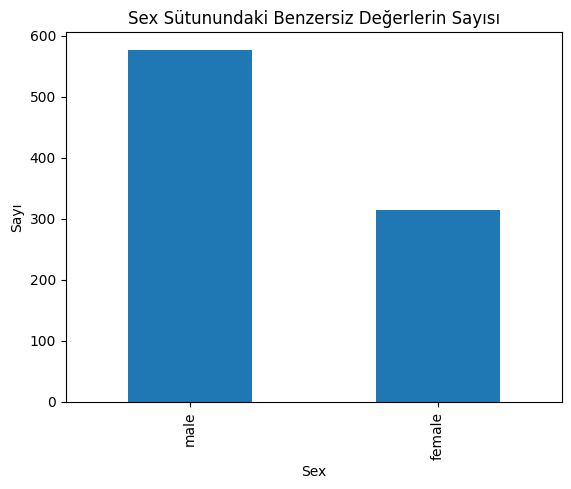

<bound method Series.unique of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [18]:
import matplotlib.pyplot as plt

counts = df['Sex'].value_counts()
counts.plot(kind='bar')
plt.title('Sex Sütunundaki Benzersiz Değerlerin Sayısı')
plt.xlabel('Sex')
plt.ylabel('Sayı')
plt.show()
df["Sex"].unique

**Soru 6**: `Sex` sütununu LabelEncoder kullanarak sayısal değerlere dönüştürün (`male=0`, `female=1`).

In [35]:
#LabelEncoder kategorik metin verilerini sayıya dönüştürür
from sklearn.preprocessing import LabelEncoder
df["Sex_encoded"]=LabelEncoder().fit_transform(df["Sex"])
df[['Sex', 'Sex_encoded']].head(10)

,Sex,Sex_encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
5,male,1
6,male,1
7,male,1
8,female,0
9,female,0


**Soru 7**: `Name` sütunundaki değerleri küçük harfe çevirin ve yeni bir sütun (`Name_lower`) oluşturun.

In [41]:
df["Name_lower"] = df["Name"].apply(str.lower)
print(df[['Name', 'Name_lower']].head())


                                                Name  \
0                            Braund, Mr. Owen Harris   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2                             Heikkinen, Miss. Laina   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4                           Allen, Mr. William Henry   

                                          Name_lower  
0                            braund, mr. owen harris  
1  cumings, mrs. john bradley (florence briggs th...  
2                             heikkinen, miss. laina  
3       futrelle, mrs. jacques heath (lily may peel)  
4                           allen, mr. william henry  


**Soru 8**: `Fare` sütununu MinMaxScaler ile [0,1] aralığına normalleştirin.

In [45]:
from sklearn.preprocessing import MinMaxScaler
df['Fare_minmax'] = MinMaxScaler().fit_transform(df[['Fare']])
df[['Fare', 'Fare_minmax']].head()

,Fare,Fare_minmax
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713


**Soru 9**: `Ticket` sütununda yalnızca rakamlardan oluşan değerleri bulun (`str.isdigit`).

In [49]:
df[df["Ticket"].str.isdigit()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_filled,Sex_encoded,Name_lower,Fare_minmax
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,0,"futrelle, mrs. jacques heath (lily may peel)",0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Unknown,1,"allen, mr. william henry",0.015713
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown,1,"moran, mr. james",0.016510
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E46,1,"mccarthy, mr. timothy j",0.101229
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Unknown,1,"palsson, master. gosta leonard",0.041136


**Soru 10**: `Age` sütununu StandardScaler ile standardize edin (ortalama 0, standart sapma 1).

In [53]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df["Age_std"] = std_scaler.fit_transform(df[["Age"]])
print(df[['Age', 'Age_std']].head())

    Age   Age_std
0  22.0 -0.530377
1  38.0  0.571831
2  26.0 -0.254825
3  35.0  0.365167
4  35.0  0.365167


## Orta Düzey Sorular

**Soru 11**: `Age` sütunundaki eksik verileri, `Pclass` gruplarına göre medyan ile doldurun.

In [37]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))


**Soru 12**: `Fare` sütununda IQR yöntemiyle aykırı değerleri tespit edin ve aykırı olan satırların indekslerini listeleyin.

In [68]:
import seaborn as sns
# 1. Çeyrek (Q1) ve 3. Çeyrek (Q3) hesapla
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
# Aykırı değer sınırlarını belirle
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

aykiri_indeksler = df[(df['Fare'] < alt_sinir) | (df['Fare'] > ust_sinir)].index
print(aykiri_indeksler.tolist())




[1, 27, 31, 34, 52, 61, 62, 72, 88, 102, 118, 120, 124, 139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765, 779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]


**Soru 13**: `Embarked` sütununu one-hot encoding ile kodlayın ve dummy tuzağını önlemek için bir sütunu silin.

In [4]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
embarked_dummies = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, embarked_dummies], axis=1)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True


**Soru 14**: `Name` sütununda 'Miss.' içeren satırları filtreleyin ve yeni bir sütun (`Is_Miss`) oluşturun (1: Miss, 0: Değil).

In [13]:
df['Is_Miss'] = df['Name'].str.contains('Miss.', na=False)
df['Is_Miss'] = df['Is_Miss'].astype(int)
df_miss = df[['Name', 'Is_Miss']]
print(df_miss.head(10))

                                                Name  Is_Miss
0                            Braund, Mr. Owen Harris        0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...        0
2                             Heikkinen, Miss. Laina        1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)        0
4                           Allen, Mr. William Henry        0
5                                   Moran, Mr. James        0
6                            McCarthy, Mr. Timothy J        0
7                     Palsson, Master. Gosta Leonard        0
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)        0
9                Nasser, Mrs. Nicholas (Adele Achem)        0


**Soru 15**: `Ticket` sütunundaki değerlerin başındaki ve sonundaki boşlukları kaldırın (`str.strip`).

In [13]:
df["Ticket"] = df["Ticket"].str.strip()
df[['Ticket']].head()
#.str.strip() → Her bir hücredeki baş ve sondaki boşlukları siler

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


**Soru 16**: `Age` sütununda Z-Score yöntemiyle (|Z| > 3) aykırı değerleri tespit edin.

In [ ]:
#Z-Score, bir değerin ortalamadan kaç standart sapma uzaklıkta olduğunu gösterir.
#Z-Score = veri - ortalama / std sapma
import numpy as np
age_mean = df["Age"].mean()
age_std = df["Age"].std()
df["Age_zscore"] = (df["Age"] - age_mean) / age_std
print(df[np.abs(df["Age_zscore"]) > 3][["Age", "Age_zscore"]])


      Age  Age_zscore
630  80.0    3.462699
851  74.0    3.049660


**Soru 17**: `Sex` ve `Embarked` sütunlarını birleştirerek yeni bir özellik oluşturun (ör. `male_S`, `female_Q`) ve `zip` fonksiyonunu kullanın.

In [13]:
#Python’da zip(a, b) → iki listeyi elemanlarına göre eşleştirir:

Embarked_sex = list(zip(df['Embarked'], df['Sex']))
df['Embarked_Sex'] = pd.Series([f"{p}_{s}" for p, s in Embarked_sex])
df[['Embarked', 'Sex', 'Embarked_Sex']].head()





,Embarked,Sex,Embarked_Sex
0,S,male,S_male
1,C,female,C_female
2,S,female,S_female
3,S,female,S_female
4,S,male,S_male


**Soru 18**: `Embarked` sütunundaki eksik verileri mod ile doldurun.

In [18]:
#burada mean() kullanamayız çünkü mean sadece numerik verilerin ortalamasını alır
mod_embarked = df["Embarked"].mode()
df["mod_embarked"] = df["Embarked"].fillna(mod_embarked)

**Soru 19**: `Name` sütununda virgül (`,`) karakterini nokta (`.`) ile değiştirin (`str.replace`).

In [11]:
df["Name"] = df["Name"].str.replace(",", ".")
df[['Name']].head()

,Name
0,Braund. Mr. Owen Harris
1,Cumings. Mrs. John Bradley (Florence Briggs Th...
2,Heikkinen. Miss. Laina
3,Futrelle. Mrs. Jacques Heath (Lily May Peel)
4,Allen. Mr. William Henry


**Soru 20**: `Fare` sütununda negatif veya sıfır değerleri kontrol edin ve bunları medyan ile değiştirin.

In [10]:
fare_median = df["Fare"].median()
df.loc[df["Fare"] <= 0, "Fare"] = fare_median
print((df["Fare"] <= 0).sum())



0


## İleri Düzey Sorular

**Soru 21**: `Age` sütunundaki eksik verileri, `Pclass` ve `Sex` kombinasyonlarına göre medyan ile doldurun.

In [ ]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
print("Eksik Age sayısı:", df['Age'].isnull().sum())
#Lambda, Python'da anonim fonksiyonlar oluşturmak için kullanılan bir yapıdır. tek satırlık kodlar için ideal

Eksik Age sayısı: 0


**Soru 22**: `Fare` sütunundaki aykırı değerleri IQR yöntemiyle tespit edin ve bunları Q1 - 1.5*IQR ve Q3 + 1.5*IQR sınırlarıyla sınırlandırın (`clip`).

In [25]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
#alt ve üst sınırları belirleyelim
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# fare sütunundaki değerleri sınırlandıralım
df['Fare_clipped'] = df['Fare'].clip(lower=lower_bound, upper=upper_bound)
print("Orijinal Fare İstatistikleri:")
print(df['Fare'].describe())
print("\n Sınırlandırılmış Fare İstatistikleri:")
print(df['Fare_clipped'].describe())
aykiri  = df[df['Fare'] != df['Fare_clipped']].shape[0]
print(f"\n Aykırı değer sayısı: {aykiri}")

Orijinal Fare İstatistikleri:
count    891.000000
mean      32.447545
std       49.570235
min        4.012500
25%        7.925000
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

 Sınırlandırılmış Fare İstatistikleri:
count    891.000000
mean      24.287299
std       20.273302
min        4.012500
25%        7.925000
50%       14.454200
75%       31.000000
max       65.612500
Name: Fare_clipped, dtype: float64

 Aykırı değer sayısı: 116


**Soru 23**: `Embarked` sütununu hedef (`Survived`) bazlı kodlayın (target encoding) ve yeni bir sütun (`Embarked_target`) oluşturun.

In [30]:
#Embarked sütunundaki eksik verileri dolduruyoruz 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Target encoding: Her embarked kategorisi için survived ortalamasını hesaplıyoruz. 
target_means = df.groupby('Embarked')['Survived'].mean()
df['Embarked_target'] = df['Embarked'].map(target_means)
print("Embarked kategorileri ve Survived ortalamaları:")
print(target_means)
print("İlk birkaç satır: ")
print(df[['Embarked', 'Embarked_target', 'Survived']].head())

Embarked kategorileri ve Survived ortalamaları:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
İlk birkaç satır: 
  Embarked  Embarked_target  Survived
0        S         0.339009         0
1        C         0.553571         1
2        S         0.339009         1
3        S         0.339009         1
4        S         0.339009         0


**Soru 24**: `Name` sütunundan unvanları (ör. Mr., Mrs., Miss.) çıkarın ve yeni bir sütun (`Title`) oluşturun (`str.extract` ile regex kullanın). Yeni oluşturulan Title sütunu yolcunun sadece unvanını içermeli.

In [5]:
df["Title"] = df["Name"].str.extract(r',\s*([^\.]+)\.')
print(df[["Name", "Title"]].head(10))



                                                Name   Title
0                            Braund, Mr. Owen Harris      Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                             Heikkinen, Miss. Laina    Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                           Allen, Mr. William Henry      Mr
5                                   Moran, Mr. James      Mr
6                            McCarthy, Mr. Timothy J      Mr
7                     Palsson, Master. Gosta Leonard  Master
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs


**Soru 25**: `Age` sütununu üç gruba ayırın (çocuk: <18, yetişkin: 18-60, yaşlı: >60) ve `lambda` fonksiyonu kullanarak yeni bir sütun (`Age_Group`) oluşturun. Kodlama ile yapılabileceği gibi `cut`, `qcut` fonksiyonlarının araştırılması ve bu fonskyionlardan uygun olanın kullanılması istenmektedir.

In [16]:
df["Age_Group"] = df["Age"].apply(lambda x: 
    "Çocuk" if x < 18 else
    "Yaşlı" if x > 60 else
    "Yetişkin"
)
print(df[["Age", "Age_Group"]].head(15))
#bins sınırları belirler labels gruplara isim verir


     Age Age_Group
0   22.0  Yetişkin
1   38.0  Yetişkin
2   26.0  Yetişkin
3   35.0  Yetişkin
4   35.0  Yetişkin
5    NaN  Yetişkin
6   54.0  Yetişkin
7    2.0     Çocuk
8   27.0  Yetişkin
9   14.0     Çocuk
10   4.0     Çocuk
11  58.0  Yetişkin
12  20.0  Yetişkin
13  39.0  Yetişkin
14  14.0     Çocuk


**Soru 26**: `Ticket` sütununda yalnızca rakamlardan oluşan değerleri sayısala çevirin ve yeni bir sütun (`Ticket_numeric`) oluşturun (`to_numeric`, `errors='coerce'`).

In [17]:
df["Ticket_numeric"] = pd.to_numeric(df["Ticket"].where(df["Ticket"].str.isdigit()), errors='coerce')

print(df[["Ticket", "Ticket_numeric"]].head(10))

             Ticket  Ticket_numeric
0         A/5 21171             NaN
1          PC 17599             NaN
2  STON/O2. 3101282             NaN
3            113803        113803.0
4            373450        373450.0
5            330877        330877.0
6             17463         17463.0
7            349909        349909.0
8            347742        347742.0
9            237736        237736.0


**Soru 27**: `Fare` sütununda aykırı değerleri Z-Score yöntemiyle (|Z| > 3) tespit edin ve bunları medyan ile değiştirin.

In [19]:
from scipy.stats import zscore
# Z-score hesapla
z_scores = zscore(df["Fare"], nan_policy='omit')

# Aykırı değerleri belirle (|Z| > 3)
outliers = np.abs(z_scores) > 3

# Medyanı hesapla
fare_median = df["Fare"].median()

# Aykırı değerleri medyan ile değiştir
df.loc[outliers, "Fare"] = fare_median

# Kontrol edelim: Kaç aykırı vardı?
print("Değiştirilen aykırı değer sayısı:", outliers.sum())

Değiştirilen aykırı değer sayısı: 20


**Soru 28**: `Cabin` sütununda yalnızca ilk harfi alın (ör. 'C23' → 'C') ve yeni bir sütun (`Cabin_letter`) oluşturun (`str[0]`).

In [23]:
# Cabin sütununda boş olmayanlardan ilk harfi al, NaN olanları at
df["Cabin_letter"] = df["Cabin"].dropna().str[0]

print(df[["Cabin", "Cabin_letter"]].dropna().head(10))

          Cabin Cabin_letter
1           C85            C
3          C123            C
6           E46            E
10           G6            G
11         C103            C
21          D56            D
23           A6            A
27  C23 C25 C27            C
31          B78            B
52          D33            D


**Soru 29**: `Embarked` sütununu frekans bazlı kodlayın (her kategorinin frekansını kullanın) ve yeni bir sütun (`Embarked_freq`) oluşturun.

In [25]:
# Her 'Embarked' değeri için frekansları hesapla
freq_map = df["Embarked"].value_counts(normalize=False)

# Frekansları her satıra karşılık gelecek şekilde eşleştir
df["Embarked_freq"] = df["Embarked"].map(freq_map)

print(df[["Embarked", "Embarked_freq"]].head(10))

  Embarked  Embarked_freq
0        S          644.0
1        C          168.0
2        S          644.0
3        S          644.0
4        S          644.0
5        Q           77.0
6        S          644.0
7        S          644.0
8        S          644.0
9        C          168.0


**Soru 30**: `Age` ve `Fare` sütunlarını kullanarak `map` fonksiyonu ile bir yaş-fiyat oranı (`Age_Fare_Ratio`) oluşturun (ör. `Age / Fare`).

In [29]:

df["Age_Fare_Ratio"] = df[["Age", "Fare"]].apply(
    lambda x: x["Age"] / x["Fare"] if pd.notnull(x["Age"]) and pd.notnull(x["Fare"]) and x["Fare"] != 0 else None, 
    axis=1
)
print(df[["Age", "Fare", "Age_Fare_Ratio"]].head(10))

    Age     Fare  Age_Fare_Ratio
0  22.0   7.2500        3.034483
1  38.0  71.2833        0.533084
2  26.0   7.9250        3.280757
3  35.0  53.1000        0.659134
4  35.0   8.0500        4.347826
5   NaN   8.4583             NaN
6  54.0  51.8625        1.041215
7   2.0  21.0750        0.094899
8  27.0  11.1333        2.425157
9  14.0  30.0708        0.465568


## Araştırma Soruları

Aşağıdaki sorular, belirtilen konularda bahsedilmeyen ancak önemli olan yöntem ve fonksiyonları keşfetmek için tasarlanmıştır.

**Araştırma Soru 1**: `sklearn.impute.IterativeImputer` fonksiyonunu araştırın ve `Age` sütunundaki eksik verileri doldurmak için nasıl kullanılabileceğini açıklayın.

In [31]:
#IterativeImputer, eksik verileri diğer sütunlara bakarak tahmin ederek doldurur.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state = 42 )
df[["Age"]] = imputer.fit_transform(df[["Age"]])

**Araştırma Soru 2**: `sklearn.preprocessing.RobustScaler` fonksiyonunu araştırın ve `Fare` sütununu ölçeklendirmek için nasıl kullanılabileceğini açıklayın.

In [33]:
#RobustScaler, veriyi ölçeklendirirken medyan ve çeyreklik aralığı (IQR) kullanır.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df["Fare_scaled"] = scaler.fit_transform(df[["Fare"]])

**Araştırma Soru 3**: `pandas.cut` fonksiyonunu araştırın ve `Age` sütununu eşit aralıklı yaş gruplarına ayırmak için nasıl kullanılabileceğini açıklayın.

In [34]:
df["AgeGroup"] = pd.cut(df["Age"], bins=5, labels=["0-16", "17-32", "33-48" , "49-64", "65+"])

**Araştırma Soru 4**: `sklearn.preprocessing.OrdinalEncoder` fonksiyonunu araştırın ve `Embarked` sütununu sıralı bir şekilde kodlamak için nasıl kullanılabileceğini açıklayın.

In [35]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df["Embarked_encoded"] = encoder.fit_transform(df[["Embarked"]])

**Araştırma Soru 5**: `numpy.log1p` fonksiyonunu araştırın ve `Fare` sütunundaki çarpıklığı azaltmak için nasıl kullanılabileceğini açıklayın.

In [36]:
import numpy as np

df["Fare_log"] = np.log1p(df["Fare"])